In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from obspy.io.segy.segy import _read_segy
from obspy.io.segy.segy import iread_segy

# Carregando os dados

#### Método 1

In [2]:
secao = _read_segy('datasets/In-line 444.sgy')

In [3]:
secao.binary_file_header

Binary File Header:
	job_identification_number: 2
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 0
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 4000
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 463
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 1
	ensemble_fold: 0
	trace_sorting_code: 4
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [4]:
secao.traces

[Trace sequence number within line: 1
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 2
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 3
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 4
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 5
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 6
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 7
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 8
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 9
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 10
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 11
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 12
463 samples, dtype=float32, 250.00 Hz,
 Trace sequence number within line: 13
463 samples, dtype=float32, 250.00

In [5]:
df = pd.DataFrame({'Trace_'+str(i+1):secao.traces[i].data for i in range(len(secao.traces))})
df.head()

,Trace_1,Trace_2,Trace_3,Trace_4,Trace_5,Trace_6,Trace_7,Trace_8,Trace_9,Trace_10,...,Trace_942,Trace_943,Trace_944,Trace_945,Trace_946,Trace_947,Trace_948,Trace_949,Trace_950,Trace_951
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Método 2 

In [6]:
dados = iread_segy('datasets/In-line 444.sgy')

In [7]:
dados

<generator object iread_segy at 0x7f935c5aa660>

In [8]:
secao = np.asarray([i for i in dados])

In [9]:
secao.shape

(951, 463)

In [10]:
df2 = pd.DataFrame(secao.T)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,941,942,943,944,945,946,947,948,949,950
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Gerando gráficos

#### Imagem das seções sísmicas

In [11]:
#Taxa de amostragem
dt = 1/250
t = np.arange(len(df))*dt

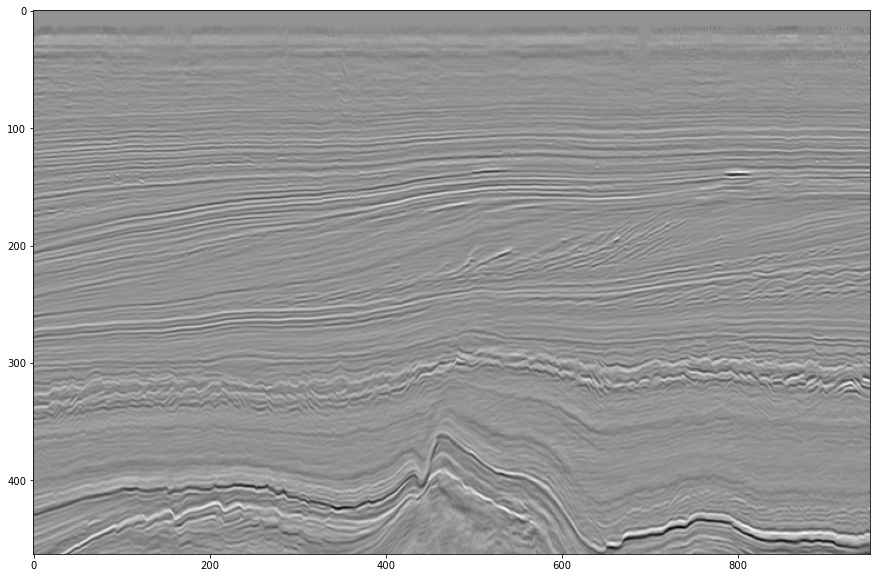

In [12]:
plt.figure(figsize=(15,10))
plt.imshow(df2,aspect='auto',cmap='gray')

Text(0.5, 0, 'Metros (m)')

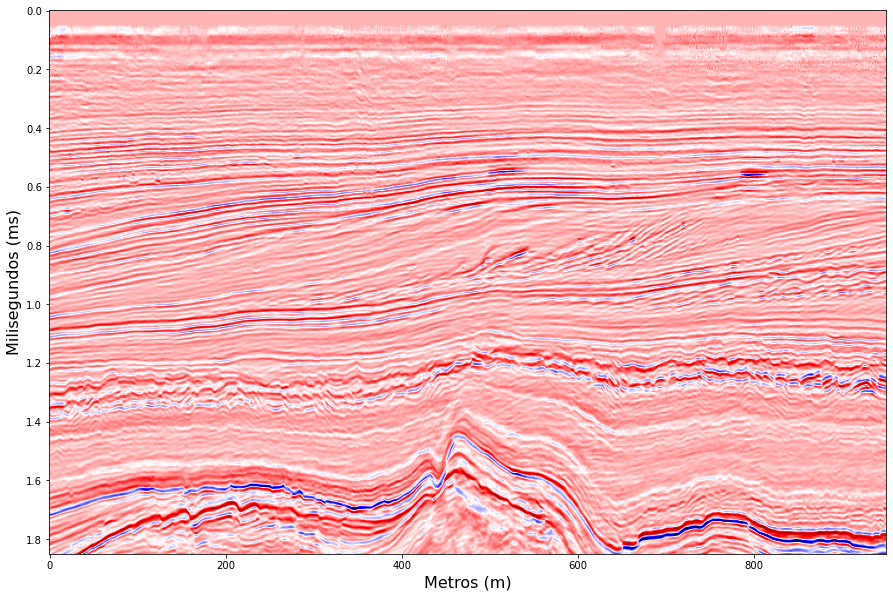

In [13]:
plt.figure(figsize=(15,10))
plt.imshow(df2,aspect='auto',cmap='seismic')
plt.yticks(ticks=np.arange(0,len(df),50),labels=np.arange(0,len(df),50)*dt)
plt.ylabel('Milisegundos (ms)',fontsize=16)
plt.xlabel('Metros (m)',fontsize=16)

#### Imagem dos traços

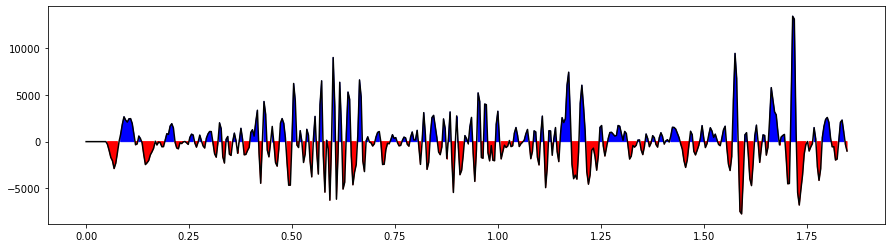

In [14]:
plt.figure(figsize=(15,4))

plt.plot(t,df2[550],c='black')

plt.fill_between(t,y1=df2[550],where=(df2[550]>0),color='blue')

plt.fill_between(t,y1=df2[550],where=(df2[550]<0),color='r')

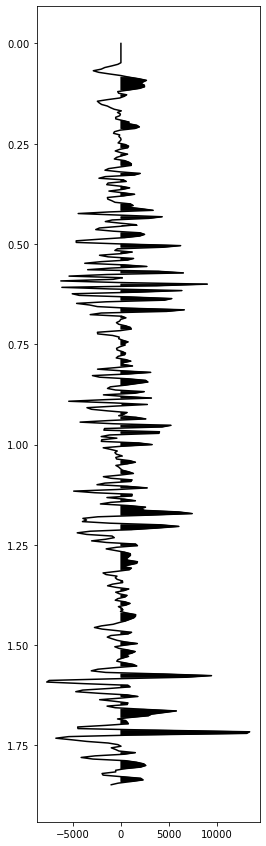

In [15]:
plt.figure(figsize=(4,15))

plt.gca().invert_yaxis()

plt.plot(df2[550],t,c='black')

plt.fill_betweenx(t,x1=df2[550],where=(df2[550]>0),color='black')